In [49]:
import numpy as np
import pandas as pd

In [50]:
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=columns)
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


traget = price  
features = all columns with continious values 

In [51]:

continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


cars_features = cars[continuous_values_cols].copy()
cars_features.replace("?", np.nan, inplace=True)
cars_features = cars_features.astype(float)
cars_features = cars_features.dropna(subset=['price'])
cars_features.head(5)

continuous_values_cols.remove('price')

In [52]:
cars_features.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [53]:
cars_features = cars_features.fillna(cars_features.mean())
cars_features.isnull().sum()


normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_rate     0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [54]:
price = cars_features['price']
cars_features = (cars_features - cars_features.min())/(cars_features.max()- cars_features.min())
cars_features['price'] = price

In [55]:
cars_features

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    shuffle = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle)
    
    train_index_ends = int(len(rand_df) /2)
    train_df = df[: train_index_ends]
    test_df = df[train_index_ends:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    predicted = knn.predict(test_df[[train_col]])
    
    rmse = mean_squared_error(predicted, test_df[target_col])
    return np.sqrt(rmse)

rmse_res = dict()
for col in continuous_values_cols:
    rmse_res[col] = knn_train_test(col, 'price', cars_features)

In [57]:
print(min(rmse_res, key= rmse_res.get) + " has best rmse result")
rmse_res


horsepower has best rmse result


{'bore': 13397.091693481998,
 'city_mpg': 4814.7780148494103,
 'compression_rate': 8096.3015121133867,
 'curb_weight': 5166.8285806461754,
 'height': 10839.693635873846,
 'highway_mpg': 4628.7930938146865,
 'horsepower': 4267.7303610297877,
 'length': 8304.1893462645621,
 'normalized_losses': 8131.4368820724876,
 'peak_rpm': 9759.2099697700633,
 'stroke': 9334.714914185055,
 'wheel_base': 9969.2432917001752,
 'width': 7110.4126300451044}

In [58]:
def knn_train_test(train_col, target_col, df, k_value):
    
    np.random.seed(1)
    
    shuffle = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle)
    
    train_index_ends = int(len(rand_df) /2)
    train_df = df[: train_index_ends]
    test_df = df[train_index_ends:]
    k_rmse_value = dict()
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predicted = knn.predict(test_df[[train_col]])
    
        rmse = mean_squared_error( test_df[target_col],predicted)
        k_rmse_value[k] = np.sqrt(rmse)
    return k_rmse_value
k_value = [1, 3, 5, 7, 9]
rmse_res = dict()
for col in continuous_values_cols:
    rmse_res[col] = knn_train_test(col, 'price', cars_features,k_value)

In [59]:
rmse_res

{'bore': {1: 16502.858944335483,
  3: 13895.111787987171,
  5: 13397.091693481998,
  7: 11075.156453540423,
  9: 10178.905997122287},
 'city_mpg': {1: 5347.1502616620082,
  3: 5210.2611302222185,
  5: 4814.7780148494103,
  7: 4575.9500050566039,
  9: 4770.3441789226026},
 'compression_rate': {1: 8085.6051421555012,
  3: 8137.9697256948321,
  5: 8096.3015121133867,
  7: 7896.6928707790858,
  9: 7823.115528549677},
 'curb_weight': {1: 6566.7491754043158,
  3: 5635.1847483924475,
  5: 5166.8285806461754,
  7: 5239.6312507047951,
  9: 5244.5555635847895},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.3309652812659},
 'highway_mpg': {1: 5188.3334702021421,
  3: 4655.0814815167259,
  5: 4628.7930938146865,
  7: 4112.3878029567513,
  9: 4029.9622707968324},
 'horsepower': {1: 7027.6069712651306,
  3: 5400.9297932358968,
  5: 4267.7303610297877,
  7: 3821.3765663687641,
  9: 3461.132024333479},
 'length': {1: 10053.57906

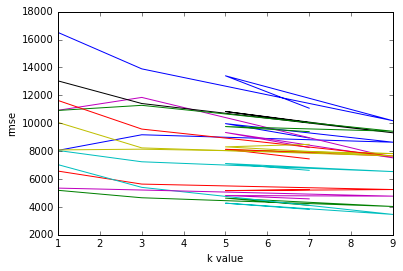

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline


for k,v in rmse_res.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)

    plt.xlabel("k value")
    plt.ylabel("rmse")

In [61]:
best = dict()

for k,v in rmse_res.items():
    temp = list()
    temp_dict = rmse_res.get(k)
    for key,value in temp_dict.items():
        temp.append(value)
    best[k]= np.mean(temp)
    temp.clear()


for k,v in sorted(best.items(), key=lambda p:p[1]):
    print(k,v)
    print('')

highway_mpg 4522.91162386

horsepower 4795.75514325

city_mpg 4943.69671814

curb_weight 5570.58986375

width 7108.4762583

compression_rate 8007.93695586

length 8545.37412328

normalized_losses 8885.00658765

wheel_base 8953.71211446

stroke 9576.24041619

peak_rpm 10154.3035007

height 10927.5297036

bore 13009.8249753



In [62]:
# Multivariate model

def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
        
    shuffle = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle)
    
    train_index_ends = int(len(rand_df) /2)
    train_df = df[: train_index_ends]
    test_df = df[train_index_ends:]

    knn = KNeighborsRegressor()
    knn.fit(train_df[train_col], train_df[target_col])
    predicted = knn.predict(test_df[train_col])
    
    rmse = mean_squared_error(test_df[target_col],predicted)
    return np.sqrt(rmse)

In [63]:
best_features = ['highway_mpg', 'city_mpg', 'horsepower', 'curb_weight', 'width']
rmse_res = dict()

rmse_res[str(best_features[:2])] = knn_train_test(best_features[:2], 'price', cars_features)
rmse_res[str(best_features[:3])] = knn_train_test(best_features[:3], 'price', cars_features)
rmse_res[str(best_features[:4])] = knn_train_test(best_features[:4], 'price', cars_features)
rmse_res[str(best_features[:5])] = knn_train_test(best_features[:5], 'price', cars_features)


In [64]:
for k,v in sorted(rmse_res.items(), key=lambda p: p[1]):
    print(k,v)

['highway_mpg', 'city_mpg', 'horsepower'] 3836.21904665
['highway_mpg', 'city_mpg', 'horsepower', 'curb_weight'] 3998.05135248
['highway_mpg', 'city_mpg', 'horsepower', 'curb_weight', 'width'] 4479.4056975
['highway_mpg', 'city_mpg'] 5439.45735842


In [65]:
def knn_train_test(train_col, target_col, df, k_value):
    
    np.random.seed(1)
    
    shuffle = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle)
    
    train_index_ends = int(len(rand_df) /2)
    train_df = df[: train_index_ends]
    test_df = df[train_index_ends:]
    
    k_rmse_value = dict()
    
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])
        predicted = knn.predict(test_df[train_col])
    
        rmse = mean_squared_error(test_df[target_col],predicted)
        k_rmse_value[k] = np.sqrt(rmse)
    return k_rmse_value

k_value = [i for i in range(1,26)]
rmse_res = dict()

first_best = ['highway_mpg', 'city_mpg', 'horsepower']
second_best = ['highway_mpg', 'city_mpg', 'horsepower', 'curb_weight']
third_best = ['highway_mpg', 'city_mpg', 'horsepower', 'curb_weight', 'width']


rmse_res[str(first_best)] = knn_train_test(first_best, 'price', cars_features, k_value)
rmse_res[str(second_best)] = knn_train_test(second_best, 'price', cars_features, k_value)
rmse_res[str(third_best)] = knn_train_test(third_best, 'price', cars_features, k_value)

In [66]:
# Search for the lowest rmse of three models
best_k_value = dict()
for k,v in rmse_res.items():
    temp = list()
    temp_dict = rmse_res.get(k)
    minimal_value = min(list(v.values()))
    keys = None
    for key, value in temp_dict.items():
        if minimal_value == value:
            keys = key
    best_k_value[str(k)] = (keys, minimal_value) 


In [67]:
for k,v in best_k_value.items():
    print(k)
    print(v)
print(" ")
print("Here we can see number of hyperparameter of the lowest rmse for each model")

['highway_mpg', 'city_mpg', 'horsepower', 'curb_weight', 'width']
(16, 3491.3512111095629)
['highway_mpg', 'city_mpg', 'horsepower']
(11, 3155.8393769557706)
['highway_mpg', 'city_mpg', 'horsepower', 'curb_weight']
(21, 3343.8208169633481)
 
Here we can see number of hyperparameter of the lowest rmse for each model


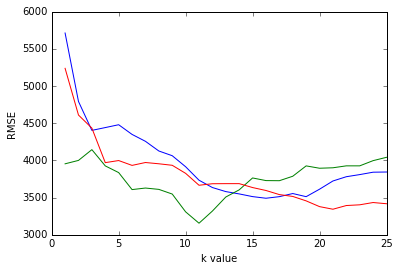

In [68]:
for k,v in rmse_res.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [69]:
def knn_train_test(train_col, target_col, df, k_value):
    
    np.random.seed(1)
    
    shuffle = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle)
    
    train_index_ends = int(len(rand_df) /2)
    train_df = df[: train_index_ends]
    test_df = df[train_index_ends:]
    
    k_rmse_value = dict()
    
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])
        predicted = knn.predict(test_df[train_col])
    
        rmse = mean_squared_error(test_df[target_col],predicted)
        k_rmse_value[k] = np.sqrt(rmse)
    return k_rmse_value